% Machine Learning and Pattern Recognition (Revision)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

$$f(\mathbf x) = \mathbf w^\top \mathbf x$$

## Gradient

- Residual: $\mathbf r = \mathbf y - X \mathbf w$
- Residual sum of squares (RSS): $\mathbf r^\top \mathbf r = (\mathbf y - X \mathbf w)^\top (\mathbf y - X \mathbf w) = \mathbf y^\top \mathbf y - 2 \mathbf w^\top X^\top \mathbf y + \mathbf w^\top X^\top X \mathbf w$
- Gradient w.r.t weights: $\nabla_{\mathbf w} (\mathbf r^\top \mathbf r) = -2 X^\top \mathbf y + 2 X^\top X \mathbf w$
- Fitted weights (closed form): $\hat{\mathbf w} = (X^\top X)^{-1} X \mathbf y$

> $\nabla_{\mathbf x} (\mathbf x^\top \mathbf a) = \mathbf a$, $\nabla_{\mathbf x} (\mathbf x^\top A \mathbf x) = A \mathbf x + A^\top \mathbf x$

In [2]:
X = np.array(
    [[1, 2, 3], 
     [2, 3, 4], 
     [3, 4, 5]]
) # 3*3 matrix
y = np.array([6, 9, 12])
print(np.linalg.matrix_rank(X)) # Rank=2 because row3 = 2*row2 - row1

2


In [3]:
try:
    print(np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)))
except Exception as exception:
    print(type(exception).__name__)

LinAlgError


In [4]:
try:
    print(np.dot(np.linalg.solve(np.dot(X.T, X), X.T), y))
except Exception as exception:
    print(type(exception).__name__)

LinAlgError


In [5]:
try:
    print(np.linalg.solve(X, y))
except Exception as exception:
    print(type(exception).__name__)

[-6. 15. -6.]


In [6]:
# (2, -1, 2) is also a solution
X.dot(np.array([2,-1,2]))

array([ 6,  9, 12])

## Polynomials

For univariate, $\boldsymbol\phi (x) = (1, x, x^2, \cdots, x^K)^\top$. 

For multivariate, $\boldsymbol\phi (\mathbf x) = (1, x_1, x_2, \cdots x_D, x_1 x_2, x_1 x_3, \cdots, x_{D-1} x_D, x_D^2, \cdots)^\top$

## Radial Basis Function (RBF)

$$\phi_k (\mathbf x) = \exp (-(\mathbf x - \mathbf c)^\top (\mathbf x - \mathbf c)) / h^2$$

**Properties:**
1. Bell-curve shaped, proportional to Gaussian
1. Max at $\mathbf x = \mathbf c$ (centred at $\mathbf c$)
1. $h$ is 'bandwidth', larger is wider

In [7]:
def rbf_1d(xx, cc, hh):
    return np.exp(-(xx-cc) ** 2 / hh ** 2)
def rbf_2d(xx, cc, hh):
    return np.exp(-(xx-cc).dot(xx-cc) / hh**2)

In [8]:
grid_size = 0.1
x_grid = np.arange(-10, 10, grid_size)

X, Y = np.meshgrid(x_grid, x_grid)

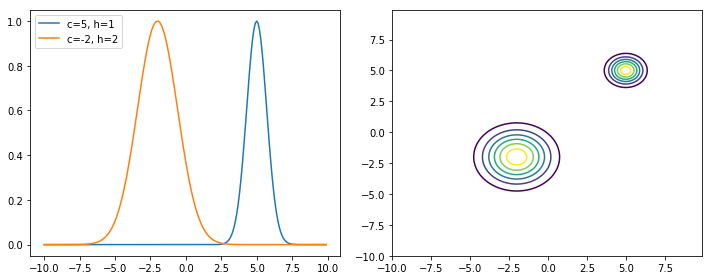

In [9]:
Z1 = np.array([rbf_2d(np.array([x,y]), np.array([5,5]), 1) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z2 = np.array([rbf_2d(np.array([x,y]), np.array([-2,-2]), 2) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.subplots(1, 2, figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(x_grid, rbf_1d(x_grid, cc=5, hh=1), label='c=5, h=1')
plt.plot(x_grid, rbf_1d(x_grid, cc=-2, hh=2), label='c=-2, h=2')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)

plt.tight_layout()

## Logistic-sigmoid Function

$$\sigma(\mathbf v^\top \mathbf x + b) = \frac{1}{1 + \exp (-\mathbf v^\top \mathbf x -b)}$$

**Properties:**
1. S-shaped, saturates at 0 and 1
1. Parallel contour in 2D
1. $\mathbf v$ determines the steepness
1. $b$ determines the position

In [10]:
def lsf_1d(xx, vv, b):
    return (1. / (1 + np.exp(-vv*xx - b)))
def lsf_2d(xx, vv, b):
    return (1. / (1 + np.exp(-vv.dot(xx) - b)))

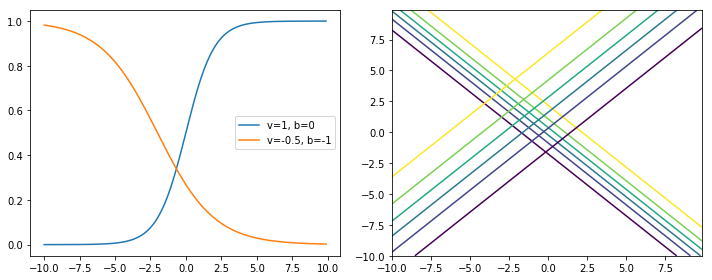

In [11]:
Z1 = np.array([lsf_2d(np.array([x,y]), np.array([1,1]), 0) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z2 = np.array([lsf_2d(np.array([x,y]), np.array([-0.5,0.5]), -1) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.subplots(1, 2, figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(x_grid, lsf_1d(x_grid, 1, 0), label='v=1, b=0')
plt.plot(x_grid, lsf_1d(x_grid, -0.5, -1), label='v=-0.5, b=-1')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)

plt.tight_layout()

## Overfitting

### Example 1: Fitting many features

In [12]:
rng = np.random.RandomState(0)
N = 100
D = 50
mus = rng.rand(N)
X = rng.randn(N, D) * 0.01 + mus[:,None]
yy = rng.randn(N) * 0.1 + mus

In [13]:
ww, res = np.linalg.lstsq(X, yy)[:2]
ww.mean(), res

/afs/inf.ed.ac.uk/user/s16/s1680642/miniconda3/envs/mlpr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(0.01993325621989606, array([0.57987382]))

In [14]:
ww0 = np.ones(D) / D
ww0.mean(), ((X.dot(ww0) - yy) ** 2).sum()

(0.02, 1.0046428116107036)

In [15]:
xx_test = rng.randn(D) + 0.5
yy_test = xx_test.dot(ww)
yy_test

-8.500205564561973

### Example2: Explaning noise with many basis function

In [16]:
X = rng.rand(N, D)
yy = rng.randn(N)

## Regularisation

Penalising extreme solutions of weights by adding sum of the square weights in the cost function. 

\begin{align*}
&&E_\lambda (\mathbf w; \mathbf y, \Phi) &= (\mathbf y - \Phi \mathbf w)^\top (\mathbf y - \Phi \mathbf w) + \lambda \mathbf w^\top \mathbf w \\
\Rightarrow &&\hat{\mathbf w} &= (\Phi^\top \Phi + \lambda \mathbb I)^{-1} \Phi^\top \mathbf y
\end{align*}

By rewriting $\mathbf y' = \begin{pmatrix} \mathbf y \\ \mathbf 0_K \end{pmatrix}$ and $\Phi' = \begin{pmatrix} \Phi \\ \sqrt{\lambda} \mathbb I_K \end{pmatrix}$, then 

$$E_\lambda (\mathbf w; \mathbf y', \Phi') = (\mathbf y' - \Phi' \mathbf w)^\top (\mathbf y' - \Phi' \mathbf w)$$

# Training, Testing and Evaluating Models

## Baseline

For example, $f(x) = b$ or $f(\mathbf x) = \mathbf w^\top \mathbf x + b$. 

## Nested models

Nested models (models with weights constraint to 0) always perform worse than the models without the constraint. 

## Generalisation error and test error

If test cases are from some (data) distribution $p(\mathbf x, y)$, 

$$\text{Generalisation error} = \mathbb E_{p(\mathbf x, y)} [L(y, f(\mathbf x)] = \int L(y, f(\mathbf x)) p(\mathbf x, y) \mathrm d \mathbf x \mathrm d y$$

Using *Monte Carlo* (unbiased) estimate, 

$$\text{Average test error} = \frac{1}{M} \sum_{m=1}^{M} L(y^{(m)}, f(\mathbf x^{(m)}), \quad \mathbf x^{(m)}, y^{(m)} \sim p(\mathbf x, y)$$

One can show $\mathbb E [\text{Average test error}] = \text{Generalisation error}$. 

## Spiltting data

One sensible split: 80% training, 10% validation, 10% testing. 

## $K$-fold cross-validation

- Outer fold: select model with lowest validation error, when averaged over $K$ folds
    - Inner fold: select hyperparameter such as $\lambda$

## Limitations of test set errors

- Future data often won't be drawn form the same distribution as training data, such as time-series. 
- Only say how well the models make prediction, under the given distribution. 

# Gaussian Distribution

## Univariate Gaussian

$$p(x) = \mathcal N(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$$

## Central Limit Theorem (CLT)

Sum of random variables sampled identically and independently from some distribution is Gaussian. 

## Error bars

$$E(\hat\theta) \pm ESE(\hat\theta)$$

## Model comparison

$$\delta_m = L(y_m, f(x_m;B)) - L(y_m, f(x_m;A)) > 0 \text{ significantly}$$

Or formally, a paired t-test. 

## Multivariate Gaussian

**Transformation:** $\begin{cases}
    \mathbf x \overset{iid}{\sim} \mathcal N(0,1) \\
    \mathbf y = A \mathbf x
\end{cases} \Rightarrow \mathrm{cov}(\mathbf y) = \Sigma = AA^\top$

$$p(\mathbf x) = \mathcal N(\mathbf x; \boldsymbol\mu, \Sigma) = \frac{1}{|\Sigma|^{1/2} (2\pi)^{D/2}} \exp \left( -\frac{1}{2} (\mathbf x - \boldsymbol\mu)^\top \Sigma^{-1} (\mathbf x - \boldsymbol\mu) \right)$$

$\Sigma$ should be positive definite or positive semi-definite. 

If $\Sigma$ is positive semi-definite, $\Sigma$ is not invertible. For example, if $x_1 = x_2$, $\Sigma = \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$. 

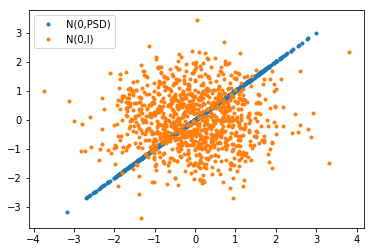

In [17]:
mean = np.array([0,0])
cov = np.ones((2,2))
rng = np.random.RandomState(0)

xs, ys = rng.multivariate_normal(mean, cov, 1000).T
plt.plot(xs, ys, '.', label='N(0,PSD)')

cov = np.diag((1,1))
xs, ys = rng.multivariate_normal(mean, cov, 1000).T
plt.plot(xs, ys, '.', label='N(0,I)')

plt.legend(loc=0)
plt.show()

# Classification

## Linear regression

$$\mathbb E_p [(y-f)^2] = p(y=1) \cdot (1-f)^2 + p(y=0) \cdot (0-f)^2 = f^2 - 2p_1 f + p_1 \quad \Rightarrow \quad \hat f = p_1$$

/afs/inf.ed.ac.uk/user/s16/s1680642/miniconda3/envs/mlpr/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


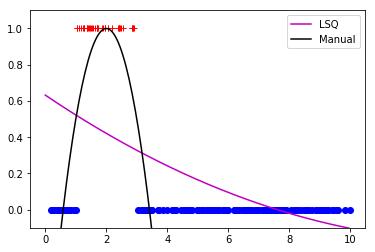

In [18]:
rng = np.random.RandomState(0)
# Train model on synthetic dataset
N = 200
X = np.random.rand(N, 1)*10
yy = (X > 1) & (X < 3)
def phi_fn(X):
    return np.concatenate([np.ones((X.shape[0],1)), X, X**2], axis=1)
ww = np.linalg.lstsq(phi_fn(X), yy)[0]

# Predictions
x_grid = np.arange(0, 10, 0.05)[:,None]
f_grid = np.dot(phi_fn(x_grid), ww)

# Predictions with alternative weights:
w2 = [-1, 2, -0.5] # Values set by hand
f2_grid = np.dot(phi_fn(x_grid), w2)

# Show demo
plt.clf()
plt.plot(X[yy==1], yy[yy==1], 'r+')
plt.plot(X[yy==0], yy[yy==0], 'bo')
plt.plot(x_grid, f_grid, 'm-', label='LSQ')
plt.plot(x_grid, f2_grid, 'k-', label='Manual')
plt.ylim([-0.1, 1.1])
plt.legend(loc=0)
plt.show()

## 'One-hot' encoding

Represent categorical varible as binary vector. 

## Gaussian Bayes classifier

$$p(\mathbf x | y=k) = \mathcal N(\mathbf x; \boldsymbol\mu_k, \Sigma_k) \overset{\text{Bayes' Rule}}{\underset{P(y=k)=\pi_k}{\Longrightarrow}} P(y=k | \mathbf x, \{\boldsymbol\mu_k, \Sigma_k, \pi_k\}) = \frac{\mathcal N(\mathbf x; \boldsymbol\mu_k, \Sigma_k) \pi_k}{\sum_{k'} \mathcal N(\mathbf x; \boldsymbol\mu_{k'}, \Sigma_{k'}) \pi_{k'}}$$

- Parameters $\theta = \{\boldsymbol\mu_k, \Sigma_k, \pi_k\}$ are estimated empirically. 
- Decision boundary for binary classification is quadratic. 

\begin{align*}
    &&P(y=0|\mathbf x) &= P(y=1|\mathbf x) \\
    \Leftrightarrow &&\log \mathcal N(\mathbf x; \boldsymbol\mu_0, \Sigma_0) &= \log \mathcal N(\mathbf x; \boldsymbol\mu_1, \Sigma_1) \\
    \Leftrightarrow &&-\frac{1}{2} (\mathbf x - \boldsymbol\mu_0)^\top \Sigma_0^{-1} (\mathbf x - \boldsymbol\mu_0) - \frac{1}{2} \log |\Sigma_0| &= -\frac{1}{2} (\mathbf x - \boldsymbol\mu_1)^\top \Sigma_1^{-1} (\mathbf x - \boldsymbol\mu_1) - \frac{1}{2} \log |\Sigma_1| \\
    \Leftrightarrow &&\mathbf x^\top (\Sigma_0^{-1} - \Sigma_1^{-1}) \mathbf x - 2 (\boldsymbol\mu_0^\top \Sigma_0^{-1} - \boldsymbol\mu_1^\top \Sigma_1^{-1}) \mathbf x &= Const
\end{align*}

## Naive Bayes classifier

- Naive assumption: Features are independent. 

$$P(\mathbf x|y=k, \theta) = \prod_d P(x_d | y=k, \theta)$$

- Usually for features that are artitrary discrete distribution. 

- Gaussian naive Bayes: Covariance matrix $\Sigma_k$ are diagonal. 

In [19]:
from scipy.stats import multivariate_normal

def GBC(x0, y0, x1, y1):
    rng = np.random.RandomState(0)
    mu0 = np.array([x0.mean(), y0.mean()])
    Sigma0 = np.cov(x0, y0)
    mu1 = np.array([x1.mean(), y1.mean()])
    Sigma1 = np.cov(x1, y1)
    xx = rng.uniform(-10, 10, (2, 5000)).T
    xx_class = multivariate_normal.pdf(xx, mu0, Sigma0) < multivariate_normal.pdf(xx, mu1, Sigma1)
    return xx[np.logical_not(xx_class)], xx[xx_class]

def GNB(x0, y0, x1, y1):
    rng = np.random.RandomState(0)
    mu0 = np.array([x0.mean(), y0.mean()])
    Sigma0 = np.diag([x0.std(), y0.std()])
    mu1 = np.array([x1.mean(), y1.mean()])
    Sigma1 = np.diag([x0.std(), y0.std()])
    xx = rng.uniform(-10, 10, (2, 5000)).T
    xx_class = multivariate_normal.pdf(xx, mu0, Sigma0) < multivariate_normal.pdf(xx, mu1, Sigma1)
    return xx[np.logical_not(xx_class)], xx[xx_class]

In [20]:
rng = np.random.RandomState(0)
mean0 = np.array([-1.5,-2.5])
cov0 = np.array([[1, 0.9], [0.9, 1]])
x0, y0 = rng.multivariate_normal(mean0, cov0, 1000).T

mean1 = np.array([-1,-1])
cov1 = np.array([[1, -0.8], [-0.8, 1]])
x1, y1 = rng.multivariate_normal(mean1, cov1, 1000).T

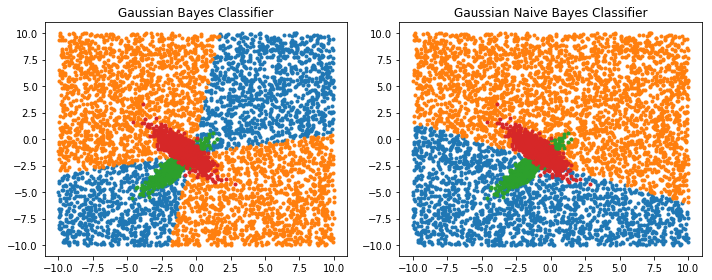

In [21]:
plt.subplots(1, 2, figsize=(10, 4))

plt.subplot(1, 2, 1)
c0, c1 = GBC(x0, y0, x1, y1)
xx0, yy0 = c0.T
xx1, yy1 = c1.T
plt.plot(xx0, yy0, '.')
plt.plot(xx1, yy1, '.')
plt.plot(x0, y0, '.')
plt.plot(x1, y1, '.')
plt.title('Gaussian Bayes Classifier')

plt.subplot(1, 2, 2)
c0, c1 = GNB(x0, y0, x1, y1)
xx0, yy0 = c0.T
xx1, yy1 = c1.T
plt.plot(xx0, yy0, '.')
plt.plot(xx1, yy1, '.')
plt.plot(x0, y0, '.')
plt.plot(x1, y1, '.')
plt.title('Gaussian Naive Bayes Classifier')

plt.tight_layout()

## Logistic regression

- Distribution: $y^{(n)} \sim \mathrm{Ber} \left( f(\mathbf x; \mathbf w) \right)$
- Outputs: $\displaystyle f(\mathbf x; \mathbf w) = \sigma(\mathbf w^\top \mathbf x) = \frac{1}{1 + \exp (\mathbf w^\top \mathbf x)}$
- Likelihood: $\displaystyle L(\mathbf w) = \prod_{n=1}^N P(y^{(n)} | \mathbf x^{(n)}, \mathbf w) = \prod_{n=1}^N \sigma(\mathbf w^\top \mathbf x)^{y^{(n)}} (1-\sigma(\mathbf w^\top \mathbf x))^{(1-y^{(n)})}$
- Loss function (negative log-likelihood, NLL): 

\begin{align*}
    \mathrm{NLL} &= - \sum_{n: y^{(n)}=1} \log \sigma(\mathbf w^\top \mathbf x) - \sum_{n: y^{(n)}=0} \log (1 - \sigma(\mathbf w^\top \mathbf x)) \\
    &\bigg(\sigma(-a) = 1-\sigma(a) \quad z^{(n)} = 2 y^{(n)} -1 \bigg) \\
    &= -\sum_{n=1}^N \log \sigma(z^{(n)} \mathbf w^\top \mathbf x^{(n)}) \\
\end{align*}

- Gradients: $\displaystyle\nabla_{\mathbf w} \mathrm{NLL} = -\sum_{n=1}^N (1-\sigma_n) z^{(n)} \mathbf x^{(n)}$

## Softmax regression

- Distribution: $y_k^{(n)} \sim \mathrm{Ber}\left( f_k(\mathbf x; W) \right)$
- Outputs: $\displaystyle f_k = \frac{\exp \left( (\mathbf w^{(k)})^\top \mathbf x \right)}{\sum_{k'} \exp \left( (\mathbf w^{(k')})^\top \mathbf x \right)}$
> $K$ possible classes. Actual class $c$. $y_k = \delta_{kc} = \begin{cases} 1 & k=c \\ 0 & k \neq c \end{cases}$. 
- Stochastic gradients: $\nabla_{\mathbf w^{(k)}} \log f_c = \delta_{kc} \mathbf x - f_k \mathbf x = (y_k - f_k) \mathbf x$
- When there is no regularisation, for $K$ weights $\mathbf w^{(k)}$, one of them is redundant, because of the degrees of freedom. 

## Latent variable model (LVM)

- Latent variable $m$: $P(m) = \begin{cases} 1-\epsilon & m=1 \\ \epsilon & m=0 \end{cases}$
- $\displaystyle P(y=1 | \mathbf x, \mathbf w, m) = \begin{cases} \sigma(\mathbf w^\top \mathbf x) & m=1 && \text{correct label} \\ \frac{1}{2} & m=0 && \text{wrong label} \end{cases}$
- Outputs: $\displaystyle P(y=1 | \mathbf x, \mathbf w) = \sum_{m \in \{0,1\}} P(y=1, m| \mathbf x, \mathbf w) = (1-\epsilon)\sigma(\mathbf w^\top \mathbf x) + \frac{\epsilon}{2}$
- Set $\epsilon$ by hand so as to 'penalise' extreme observations, or, optimise $\epsilon$ by reparametrising $b = \mathrm{logit}(\epsilon)$ and use gradient based methods. 

# Optimisation

## Gradient descent

- Steepest Gradient Descent: $\mathbf w \leftarrow \mathbf w - \eta \nabla_{\mathbf w} (\mathbf r^\top \mathbf r)$
- Stochastic Gradient Descent: Use gradient of mini-batch of examples

# Neural Networks

## Example

- Input layer: $\mathbf x$, shape (D,)
- First layer: $\mathbf h^{(1)} = g^{(1)} (W^{(1)} \mathbf x + \mathbf b^{(1)})$, where $W^{(1)}$ has shape (K, D)
- Second layer: $\mathbf h^{(2)} = g^{(2)} (W^{(2)} \mathbf h^{(1)} + \mathbf b^{(2)})$, where $W^{(2)}$ has shape (K', K)
- ...
- $g^{(l)}$ are non-linear functions such as logistic-sigmoid, rectified linear unit (ReLU). 

## Rectified linear unit (ReLU)

$$\mathrm{ReLU}(a) = \max (0, a)$$

## PReLU

$$\mathrm{PReLU}(a) = \begin{cases}
    a & a>0 \\ sa & a \leq 0 && \text{for some } s
\end{cases}$$

## Initialisation

- Don't set all the weights to 0!
- If $\mathrm{Var}(w)$ too large, units saturate and hard for updating. 
> $\mathbf w$ large $\quad \Rightarrow \quad \sigma(\mathbf w^\top \mathbf x) \to 1 \quad \Rightarrow \quad \nabla_{\mathbf w} \sigma = \sigma (1-\sigma) \mathbf x \to 0$
- $\mathrm{Var}(y) = \sum \mathrm{Var}(x) \mathrm{Var}(w) = D \cdot \mathrm{Var}(x) \mathrm{Var}(w) \quad \Rightarrow \quad \mathrm{Var}(w) = 1/D$

## Local optima

- Cost function is not unimodal and not convex. 
- Models may have many equivalent ways to represent the same model. 
- Goal is to make predictions, regardless of whether parameters are well-specified. 

## Early stopping

- Complex models generalise poorly due to over-fitting. 
- Fit less to avoid over-fitting. 
- Monitor performance on a validation set periodically. 

```python
for epoch in num_epoch:
    if val_cost is the smallest ever seen:
        store weights
    if val_cost is not improved in 20 looks-at:
        return weights stored
```

## Regularisation

- L2 regularisation
- Dropout
- Adding Gaussian noise to inputs
- Denoising auto-encoders

## Backward Propagation

- $C=AB \quad \Rightarrow \quad \bar A= \bar C B^\top \text{ and } \bar B = A^\top \bar C$

## Autoencoders

$$\mathbf f(\mathbf x) \approx \mathbf x$$

### Dimensionality reduction

\begin{align*}
    \mathbf h &= g^{(1)} (W^{(1)} \mathbf x + \mathbf b^{(1)}) \\
    \mathbf f &= g^{(2)} (W^{(2)} \mathbf h + \mathbf b^{(2)})
\end{align*}

- $W^{(1)}$ is a $K \times D$ matrix with $K \ll D$
- The transformed values $\mathbf h$ contain most of the information of $\mathbf x$
- Might be possible to fit a classifier on smaller inputs using less labelled data
- Example: Principal components analysis (PCA)

#### Principal Components Analysis (PCA)

- Data matrix: $X$
    - shape $N \times D$
    - centroid version (zero feature means)
    - similar feature variances
- Covariance matrix: $\Sigma = \frac{1}{N} X^\top X$
    - shape $D \times D$
- $K$ eigenvectors: $V = \begin{bmatrix} \mathbf v^{(1)} & \mathbf v^{(2)} & \cdots & \mathbf v^{(K)} \end{bmatrix}$
    - eigenvectors sorted by descending order of eigenvalues
    - choose the first $K$ eigenvectors
    - shape of an eigenvector $D \times 1$
- Transform to new axes ($K$-dimensional): $X_\text{kdim} = XV$
    - shape $N \times K$
- Transform back to original axes: $X_\text{proj} = X_\text{kdim} V^\top = XVV^\top$
    - shape $N \times D$

> - New axes (eigenvectors) are orthogonal
- If $V$ is $D \times D$ matrix, $VV^\top = \mathbb I$, i.e. $V$ is orthogonal matrix and no info is lost
- Transformation, not fitting, so no risk of overfitting

#### Singular Value Decomposition (SVD)

$$\underset{N \times D}{X} = \underset{N \times N}{U} \ \underset{N \times D}{\Sigma} \ \underset{D \times D}{V}^\top$$

- $U$: orthogonal, containing left singular vectors of $X$
- $\Sigma$: diagonal with $D$ singular values of $X$ as diagonal entries
- $V$: orthogonal, containing right singular vectors of $X$

$$\underset{N \times D}{X} \approx \underset{N \times K}{U} \ \underset{K \times K}{S} \ \underset{D \times K}{V}^\top$$

- $U$: 'datapoints' transformed into $K$-dimensional
- $V$: 'features' transformed into $D$-dimensional (eigenvectors)
- $X_\text{kdim} = US$, $X_\text{proj} = USV^\top$

#### Differences

**Truncated SVD:** the best low-rank approximation of a matrix, as measured by squared error

**PCA:** linear dimensionality reduction method minimising the least squares error of the distortion

#### Probabilistic PCA

$$\begin{cases}
    \underset{K \times 1}{\mathbf h} \sim \mathcal N(\mathbf 0, \mathbb I_K) \\
    \underset{D \times 1}{\boldsymbol\varepsilon} \sim \mathcal N(\mathbf 0, \sigma^2 \mathbb I_D) \\
    \underset{D \times 1}{\mathbf x} = \underset{D \times K}{V} \ \underset{K \times 1}{\mathbf h} + \underset{D \times 1}{\boldsymbol\mu} + \underset{D \times 1}{\boldsymbol\varepsilon}
\end{cases} \quad \Rightarrow \quad \mathbf x \sim \mathcal N(\boldsymbol\mu, VV^\top + \sigma^2 \mathbb I_D)$$

### Denoising and sparse autoencoders

#### Denoising autoencoders
- $K \geq D$
- Randomly set some of the features in the input to zero (using binary mask vector $\mathbf m$)
- Try to reconstruct the original uncorrupted vector
- Cost function: $\displaystyle \mathbb E_{p(\mathbf m)} \left[ \frac{1}{N} \sum_{n=1}^N \left\|\mathbf f (\mathbf x^{(n)} \odot \mathbf m) - \mathbf x^{(n)} \right\|^2 \right]$

#### Sparse autoencoders
- Only allow a small fraction of the $K$ hidden units to take on non-zero values
- Represent input vector as a linear combination of a small number of different 'sources'
- Example: To classify two clusters of data, one cluster is a 'ring' outside of the other cluster

In [22]:
X = np.array(
    [[-2, 1], 
     [-1, 1], 
     [-2, 3],
     [-1, 3],
     [3, 3],
     [4, 3],
     [3, 1],
     [4, 1]]
)
X = X - X.mean(axis=0)

In [23]:
X

array([[-3., -1.],
       [-2., -1.],
       [-3.,  1.],
       [-2.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 2., -1.],
       [ 3., -1.]])

In [24]:
V = np.linalg.eig(X.T.dot(X))[1][:,0]
V

array([1., 0.])

In [25]:
X_kdim = X.dot(V)
X_kdim

array([-3., -2., -3., -2.,  2.,  3.,  2.,  3.])

In [26]:
X_proj = X_kdim[:,None].dot(V[None,:])
X_proj

array([[-3., -0.],
       [-2., -0.],
       [-3., -0.],
       [-2., -0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 3.,  0.]])

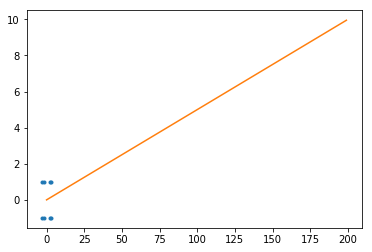

In [27]:
x, y = X.T
plt.plot(x, y, '.')
plt.plot(x_grid, )

In [28]:
X.dot(np.array([3/np.sqrt(10),1/np.sqrt(10)])).std()

2.4392621835300936

In [29]:
X.dot(V).std()

2.5495097567963922